In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets.mnist import load_data

In [2]:
from keras.datasets.mnist import load_data

In [3]:
mnistData = load_data()
(x_train,y_train),(x_test,y_test) = mnistData

In [4]:
print("x_train => ",x_train.shape)
print("y_train => ",y_train.shape)
print("x_test => ",x_test.shape)
print("y_test => ",y_test.shape)

x_train =>  (60000, 28, 28)
y_train =>  (60000,)
x_test =>  (10000, 28, 28)
y_test =>  (10000,)


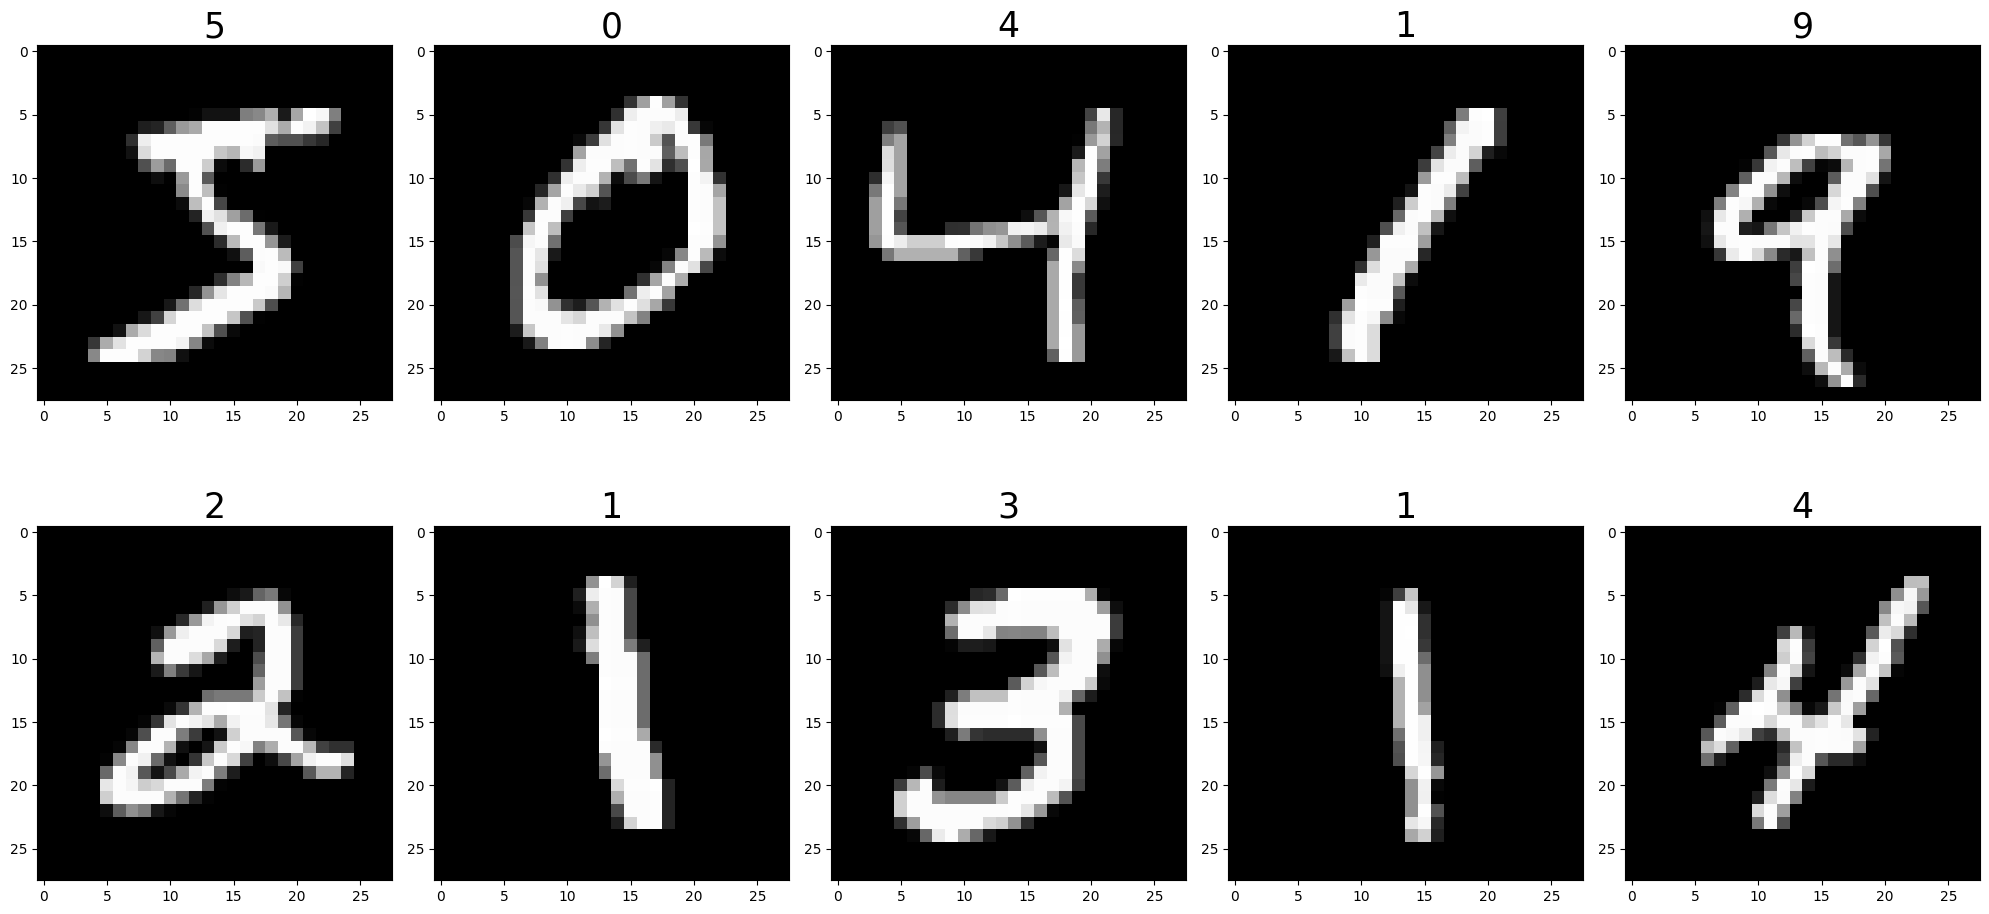

In [77]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.title(str(y_train[i]),fontsize=25)
plt.tight_layout()
plt.show()

In [78]:
x_trainR = x_train.reshape(-1,28*28)

In [79]:
y_trainOHE = to_categorical(y_train)

In [51]:
"""
raw = (28,28)
reshape = (28*28,)

w1 = (28*28,64)
b1 = (64)

w2 = (64,32)
b2 = (32)

w3 = (10,32)
b3 = (10)

loss = categorical_crossentropy
=> multinomial classification

if binary => loss = binomial_crossentropy

ps. units <=> output_dim

"""

model = Sequential()
model.add(Dense(units=64, input_dim=(28*28), activation='relu'))
model.add(Dense(units=32, input_dim=64, activation='relu'))
model.add(Dense(units=10, input_dim=32, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.fit(x_trainR,y_trainOHE,epochs=10)

Epoch 1/10
  17/1875 [..............................] - ETA: 12s - loss: 42.4782 - acc: 0.2629 

2022-12-05 14:03:00.303452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 12s 6ms/step - loss: 1.7197 - acc: 0.7824
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4115 - acc: 0.8958
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2860 - acc: 0.9249
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2285 - acc: 0.9390
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1944 - acc: 0.9468
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1713 - acc: 0.9524
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1514 - acc: 0.9575
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1393 - acc: 0.9607
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1325 - acc: 0.9630
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1214 - acc: 0.9658


In [60]:
my_pred=model.predict(x_test[0].reshape(1,-1))
my_pred.argmax()

1/1 [==============================] - 0s 14ms/step


7

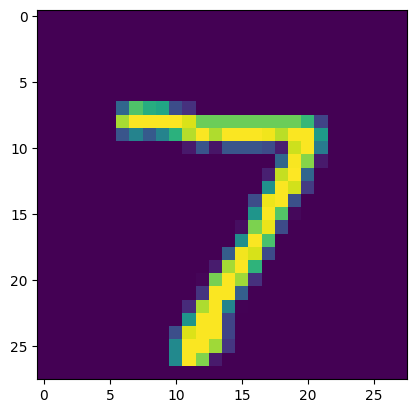

In [61]:
plt.imshow(x_test[0])

In [83]:
CNN_model = Sequential()

CNN_model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(3,3),
    activation='relu',
    input_shape=(28,28,1)
))
CNN_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
CNN_model.add(
    tf.keras.layers.Conv2D(filters=64,
    kernel_size=(3,3),
    activation='relu'
))
CNN_model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
CNN_model.add(
tf.keras.layers.Conv2D(
    filters=16,
    kernel_size=(3,3),
    activation='relu'
)
)
CNN_model.add(tf.keras.layers.Flatten())
CNN_model.add(tf.keras.layers.Dense(64,activation='relu'))
CNN_model.add(tf.keras.layers.Dense(10,activation='sigmoid'))
CNN_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [84]:
CNN_model.fit(x_train,y_trainOHE,epochs=10)

Epoch 1/10


2022-12-05 14:44:07.439561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 17s 8ms/step - loss: 1.3325 - acc: 0.4861
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1429 - acc: 0.9589
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0915 - acc: 0.9737
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0752 - acc: 0.9778
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0613 - acc: 0.9816
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0552 - acc: 0.9833
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0500 - acc: 0.9851
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0430 - acc: 0.9868
Epoch 9/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0409 - acc: 0.9876
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0395 - acc: 0.9877
